In [6]:
#imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Comparação entre notificações de sífilis adquirida e variáveis do PMAQ
Neste notebook são unidos os quantitativos de casos de
sífilis adquirida e respostas do PMAQ, agrupados pelo *código IBGE*.
Isso é feito para poder unir os dados das duas bases.

In [7]:
pmaq_df = pd.read_csv('../data/pmaq_ibge.csv', index_col=[0, 1], header=[0,1])
pmaq_df

VAR               I.11.1           I.15.9.3                  I.15.9.4        \
CODE                   1    2 9997        1     2   998 9997        1     2   
           IBGE                                                               
CNES_FINAL 110001    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   
           110002   10.0  0.0  0.0     10.0   0.0   0.0  0.0      9.0   1.0   
           110003    0.0  2.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   
           110004    8.0  0.0  0.0      1.0   7.0   0.0  0.0      1.0   7.0   
           110005    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   
...                  ...  ...  ...      ...   ...   ...  ...      ...   ...   
           522200    5.0  0.0  0.0      3.0   2.0   0.0  0.0      0.0   5.0   
           522205    2.0  1.0  0.0      2.0   1.0   0.0  0.0      2.0   1.0   
           522220    2.0  0.0  0.0      1.0   0.0   1.0  0.0      0.0   1.0   
           522230    2.0  0.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   
           530010   66.0  4.0  4.0     38.0  16.0  16.0  4.0     15.0  39.0   

VAR                      ... II.12.1.7           II.15.13             \
CODE                998  ...         1    2 9997        1     2 9997   
           IBGE          ...                                           
CNES_FINAL 110001   3.0  ...       5.0  0.0  0.0      3.0   2.0  0.0   
           110002   0.0  ...      16.0  0.0  0.0     16.0   0.0  0.0   
           110003   2.0  ...       2.0  0.0  0.0      0.0   2.0  0.0   
           110004   0.0  ...      17.0  0.0  1.0      6.0  11.0  1.0   
           110005   3.0  ...       3.0  0.0  0.0      0.0   3.0  0.0   
...                 ...  ...       ...  ...  ...      ...   ...  ...   
           522200   0.0  ...       5.0  0.0  0.0      5.0   0.0  0.0   
           522205   0.0  ...       3.0  0.0  0.0      3.0   0.0  0.0   
           522220   1.0  ...       2.0  0.0  0.0      1.0   1.0  0.0   
           522230   2.0  ...       2.0  0.0  0.0      2.0   0.0  0.0   
           530010  16.0  ...     125.0  3.0  9.0    118.0  10.0  9.0   

VAR               III.13.7.3                    
CODE                       1    2    998  9997  
           IBGE                                 
CNES_FINAL 110001        7.0  0.0   13.0   0.0  
           110002       19.0  1.0   42.0   2.0  
           110003        2.0  0.0    3.0   3.0  
           110004       28.0  0.0   35.0   9.0  
           110005        4.0  1.0    6.0   1.0  
...                      ...  ...    ...   ...  
           522200        0.0  0.0   20.0   0.0  
           522205        3.0  0.0    9.0   0.0  
           522220        1.0  0.0    7.0   0.0  
           522230        0.0  0.0    8.0   0.0  
           530010      108.0  2.0  418.0  15.0  

[3990 rows x 21 columns]

In [8]:
adquirida_df = pd.read_csv('../data/adquirida.csv', sep=';', parse_dates=['dt_notific'])
adquirida_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316785 entries, 0 to 316784
Data columns (total 34 columns):
Unnamed: 0    316785 non-null int64
dt_notific    316785 non-null datetime64[ns]
sem_not       316785 non-null float64
nu_ano        316785 non-null float64
anodiag       316785 non-null float64
sg_uf_not     316785 non-null float64
id_municip    316785 non-null float64
id_regiona    316785 non-null float64
id_unidade    316785 non-null float64
UFRES         316785 non-null float64
id_mn_resi    316785 non-null float64
dt_diag       316785 non-null object
sem_pri       316785 non-null float64
nu_idade_n    316785 non-null float64
FXETARIA      316785 non-null float64
SEXO          316785 non-null float64
cs_gestant    316785 non-null float64
cs_raca       316785 non-null float64
cs_escol_n    316785 non-null float64
cs_zona       316785 non-null float64
dt_invest     225868 non-null object
classi_fin    316785 non-null float64
criterio      316785 non-null float64
tpautocto   

### Ajustando as datas
Primeiro, filtramos os diagnosticos que foram dados entre o terceiro ciclo. Depois criamos a nova coluna que guarda mês/ano do diagnóstico.

In [9]:
adq_ciclo3_df = adquirida_df.query("'2016-08-01' < dt_notific < '2018-01-22'")

In [10]:
adq_agrup_df = adq_ciclo3_df.groupby('id_municip')['Unnamed: 0'].count()

In [11]:
pmaq_df['adquirida'] = adq_agrup_df

pmaq_df

VAR               I.11.1           I.15.9.3                  I.15.9.4        \
CODE                   1    2 9997        1     2   998 9997        1     2   
           IBGE                                                               
CNES_FINAL 110001    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   
           110002   10.0  0.0  0.0     10.0   0.0   0.0  0.0      9.0   1.0   
           110003    0.0  2.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   
           110004    8.0  0.0  0.0      1.0   7.0   0.0  0.0      1.0   7.0   
           110005    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   
...                  ...  ...  ...      ...   ...   ...  ...      ...   ...   
           522200    5.0  0.0  0.0      3.0   2.0   0.0  0.0      0.0   5.0   
           522205    2.0  1.0  0.0      2.0   1.0   0.0  0.0      2.0   1.0   
           522220    2.0  0.0  0.0      1.0   0.0   1.0  0.0      0.0   1.0   
           522230    2.0  0.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   
           530010   66.0  4.0  4.0     38.0  16.0  16.0  4.0     15.0  39.0   

VAR                      ... II.12.1.7      II.15.13            III.13.7.3  \
CODE                998  ...         2 9997        1     2 9997          1   
           IBGE          ...                                                 
CNES_FINAL 110001   3.0  ...       0.0  0.0      3.0   2.0  0.0        7.0   
           110002   0.0  ...       0.0  0.0     16.0   0.0  0.0       19.0   
           110003   2.0  ...       0.0  0.0      0.0   2.0  0.0        2.0   
           110004   0.0  ...       0.0  1.0      6.0  11.0  1.0       28.0   
           110005   3.0  ...       0.0  0.0      0.0   3.0  0.0        4.0   
...                 ...  ...       ...  ...      ...   ...  ...        ...   
           522200   0.0  ...       0.0  0.0      5.0   0.0  0.0        0.0   
           522205   0.0  ...       0.0  0.0      3.0   0.0  0.0        3.0   
           522220   1.0  ...       0.0  0.0      1.0   1.0  0.0        1.0   
           522230   2.0  ...       0.0  0.0      2.0   0.0  0.0        0.0   
           530010  16.0  ...       3.0  9.0    118.0  10.0  9.0      108.0   

VAR                                 adquirida  
CODE                 2    998  9997            
           IBGE                                
CNES_FINAL 110001  0.0   13.0   0.0       NaN  
           110002  1.0   42.0   2.0       NaN  
           110003  0.0    3.0   3.0       NaN  
           110004  0.0   35.0   9.0       NaN  
           110005  1.0    6.0   1.0       NaN  
...                ...    ...   ...       ...  
           522200  0.0   20.0   0.0       NaN  
           522205  0.0    9.0   0.0       NaN  
           522220  0.0    7.0   0.0       NaN  
           522230  0.0    8.0   0.0       NaN  
           530010  2.0  418.0  15.0       NaN  

[3990 rows x 22 columns]

In [13]:
pmaq_df1 = pmaq_df.copy()
pmaq_df1.index = pmaq_df.index.droplevel()

pmaq_df1

VAR    I.11.1           I.15.9.3                  I.15.9.4              ...  \
CODE        1    2 9997        1     2   998 9997        1     2   998  ...   
IBGE                                                                    ...   
110001    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   3.0  ...   
110002   10.0  0.0  0.0     10.0   0.0   0.0  0.0      9.0   1.0   0.0  ...   
110003    0.0  2.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   2.0  ...   
110004    8.0  0.0  0.0      1.0   7.0   0.0  0.0      1.0   7.0   0.0  ...   
110005    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   3.0  ...   
...       ...  ...  ...      ...   ...   ...  ...      ...   ...   ...  ...   
522200    5.0  0.0  0.0      3.0   2.0   0.0  0.0      0.0   5.0   0.0  ...   
522205    2.0  1.0  0.0      2.0   1.0   0.0  0.0      2.0   1.0   0.0  ...   
522220    2.0  0.0  0.0      1.0   0.0   1.0  0.0      0.0   1.0   1.0  ...   
522230    2.0  0.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   2.0  ...   
530010   66.0  4.0  4.0     38.0  16.0  16.0  4.0     15.0  39.0  16.0  ...   

VAR    II.12.1.7      II.15.13            III.13.7.3                    \
CODE           2 9997        1     2 9997          1    2    998  9997   
IBGE                                                                     
110001       0.0  0.0      3.0   2.0  0.0        7.0  0.0   13.0   0.0   
110002       0.0  0.0     16.0   0.0  0.0       19.0  1.0   42.0   2.0   
110003       0.0  0.0      0.0   2.0  0.0        2.0  0.0    3.0   3.0   
110004       0.0  1.0      6.0  11.0  1.0       28.0  0.0   35.0   9.0   
110005       0.0  0.0      0.0   3.0  0.0        4.0  1.0    6.0   1.0   
...          ...  ...      ...   ...  ...        ...  ...    ...   ...   
522200       0.0  0.0      5.0   0.0  0.0        0.0  0.0   20.0   0.0   
522205       0.0  0.0      3.0   0.0  0.0        3.0  0.0    9.0   0.0   
522220       0.0  0.0      1.0   1.0  0.0        1.0  0.0    7.0   0.0   
522230       0.0  0.0      2.0   0.0  0.0        0.0  0.0    8.0   0.0   
530010       3.0  9.0    118.0  10.0  9.0      108.0  2.0  418.0  15.0   

VAR    adquirida  
CODE              
IBGE              
110001       NaN  
110002       NaN  
110003       NaN  
110004       NaN  
110005       NaN  
...          ...  
522200       NaN  
522205       NaN  
522220       NaN  
522230       NaN  
530010       NaN  

[3990 rows x 22 columns]

In [15]:
pmaq_df1['adquirida'] = adq_agrup_df

pmaq_df1

VAR    I.11.1           I.15.9.3                  I.15.9.4              ...  \
CODE        1    2 9997        1     2   998 9997        1     2   998  ...   
IBGE                                                                    ...   
110001    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   3.0  ...   
110002   10.0  0.0  0.0     10.0   0.0   0.0  0.0      9.0   1.0   0.0  ...   
110003    0.0  2.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   2.0  ...   
110004    8.0  0.0  0.0      1.0   7.0   0.0  0.0      1.0   7.0   0.0  ...   
110005    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   3.0  ...   
...       ...  ...  ...      ...   ...   ...  ...      ...   ...   ...  ...   
522200    5.0  0.0  0.0      3.0   2.0   0.0  0.0      0.0   5.0   0.0  ...   
522205    2.0  1.0  0.0      2.0   1.0   0.0  0.0      2.0   1.0   0.0  ...   
522220    2.0  0.0  0.0      1.0   0.0   1.0  0.0      0.0   1.0   1.0  ...   
522230    2.0  0.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   2.0  ...   
530010   66.0  4.0  4.0     38.0  16.0  16.0  4.0     15.0  39.0  16.0  ...   

VAR    II.12.1.7      II.15.13            III.13.7.3                    \
CODE           2 9997        1     2 9997          1    2    998  9997   
IBGE                                                                     
110001       0.0  0.0      3.0   2.0  0.0        7.0  0.0   13.0   0.0   
110002       0.0  0.0     16.0   0.0  0.0       19.0  1.0   42.0   2.0   
110003       0.0  0.0      0.0   2.0  0.0        2.0  0.0    3.0   3.0   
110004       0.0  1.0      6.0  11.0  1.0       28.0  0.0   35.0   9.0   
110005       0.0  0.0      0.0   3.0  0.0        4.0  1.0    6.0   1.0   
...          ...  ...      ...   ...  ...        ...  ...    ...   ...   
522200       0.0  0.0      5.0   0.0  0.0        0.0  0.0   20.0   0.0   
522205       0.0  0.0      3.0   0.0  0.0        3.0  0.0    9.0   0.0   
522220       0.0  0.0      1.0   1.0  0.0        1.0  0.0    7.0   0.0   
522230       0.0  0.0      2.0   0.0  0.0        0.0  0.0    8.0   0.0   
530010       3.0  9.0    118.0  10.0  9.0      108.0  2.0  418.0  15.0   

VAR    adquirida  
CODE              
IBGE              
110001       4.0  
110002      52.0  
110003       NaN  
110004      83.0  
110005       6.0  
...          ...  
522200       9.0  
522205       NaN  
522220       2.0  
522230       NaN  
530010    1355.0  

[3990 rows x 22 columns]

### Correlação

In [16]:
pmaq_df1.corr()

VAR                I.11.1                      I.15.9.3                      \
CODE                    1         2      9997         1         2       998   
VAR        CODE                                                               
I.11.1     1     1.000000  0.030083  0.341918  0.800241  0.428163  0.116152   
           2     0.030083  1.000000  0.229715  0.149038  0.464900  0.490907   
           9997  0.341918  0.229715  1.000000  0.359388  0.135748  0.182104   
I.15.9.3   1     0.800241  0.149038  0.359388  1.000000  0.121128 -0.089376   
           2     0.428163  0.464900  0.135748  0.121128  1.000000 -0.005760   
           998   0.116152  0.490907  0.182104 -0.089376 -0.005760  1.000000   
           9997  0.341918  0.229715  1.000000  0.359388  0.135748  0.182104   
I.15.9.4   1     0.477414  0.172894  0.241938  0.673179  0.062349 -0.065812   
           2     0.808923  0.366061  0.317130  0.718514  0.723446 -0.058923   
           998   0.116152  0.490907  0.182104 -0.089376 -0.005760  1.000000   
           9997  0.341918  0.229715  1.000000  0.359388  0.135748  0.182104   
II.12.1.7  1     0.785883  0.363327  0.336377  0.795161  0.348097  0.220728   
           2     0.127535  0.123169  0.018654  0.075147  0.158062  0.083529   
           9997  0.270851  0.114448  0.746464  0.334752  0.057269  0.036292   
II.15.13   1     0.759452  0.236459  0.297772  0.825958  0.237466  0.093055   
           2     0.252419  0.540756  0.202718  0.039918  0.483352  0.513266   
           9997  0.270851  0.114448  0.746464  0.334752  0.057269  0.036292   
III.13.7.3 1     0.759521  0.325897  0.298222  0.736931  0.362765  0.203022   
           2     0.394367  0.411636  0.203126  0.399251  0.313167  0.228434   
           998   0.778990  0.311640  0.303337  0.785889  0.328029  0.182730   
           9997  0.306311  0.270157  0.759719  0.367287  0.122498  0.165863   
adquirida        0.672377  0.215277  0.368885  0.735643  0.208564  0.060588   

VAR                        I.15.9.4                      ... II.12.1.7  \
CODE                 9997         1         2       998  ...         2   
VAR        CODE                                          ...             
I.11.1     1     0.341918  0.477414  0.808923  0.116152  ...  0.127535   
           2     0.229715  0.172894  0.366061  0.490907  ...  0.123169   
           9997  1.000000  0.241938  0.317130  0.182104  ...  0.018654   
I.15.9.3   1     0.359388  0.673179  0.718514 -0.089376  ...  0.075147   
           2     0.135748  0.062349  0.723446 -0.005760  ...  0.158062   
           998   0.182104 -0.065812 -0.058923  1.000000  ...  0.083529   
           9997  1.000000  0.241938  0.317130  0.182104  ...  0.018654   
I.15.9.4   1     0.241938  1.000000  0.271997 -0.065812  ...  0.026811   
           2     0.317130  0.271997  1.000000 -0.058923  ...  0.157821   
           998   0.182104 -0.065812 -0.058923  1.000000  ...  0.083529   
           9997  1.000000  0.241938  0.317130  0.182104  ...  0.018654   
II.12.1.7  1     0.336377  0.450166  0.763219  0.220728  ...  0.141586   
           2     0.018654  0.026811  0.157821  0.083529  ...  1.000000   
           9997  0.746464  0.300803  0.223687  0.036292  ...  0.010412   
II.15.13   1     0.297772  0.463889  0.714850  0.093055  ...  0.133246   
           2     0.202718  0.034150  0.331701  0.513266  ...  0.178094   
           9997  0.746464  0.300803  0.223687  0.036292  ...  0.010412   
III.13.7.3 1     0.298222  0.423509  0.730674  0.203022  ...  0.151279   
           2     0.203126  0.284107  0.450428  0.228434  ...  0.123275   
           998   0.303337  0.444505  0.744237  0.182730  ...  0.158417   
           9997  0.759719  0.305134  0.292622  0.165863  ...  0.058403   
adquirida        0.368885  0.454668  0.621711  0.060588  ...  0.123062   

VAR                        II.15.13                     III.13.7.3            \
CODE                 9997         1         2      9997          1         2   
VAR        CO

O que nos interessa é a corelação de notificações com as respostas do PMAQ, que respondem questões sobre teste rápido e applicação de benzetacil penicilina.

In [21]:
pmaq_df1.corr().loc['adquirida', :'adquirida']

VAR     I.11.1                      I.15.9.3                                \
CODE         1         2      9997         1         2       998      9997   
CODE                                                                         
      0.672377  0.215277  0.368885  0.735643  0.208564  0.060588  0.368885   

VAR   I.15.9.4                      ... II.12.1.7            II.15.13  \
CODE         1         2       998  ...         2      9997         1   
CODE                                ...                                 
      0.454668  0.621711  0.060588  ...  0.123062  0.426881  0.843544   

VAR                      III.13.7.3                               adquirida  
CODE         2      9997          1         2       998      9997            
CODE                                                                         
      0.108328  0.426881   0.785443  0.476709  0.836733  0.411742       1.0  

[1 rows x 22 columns]

In [33]:
pmaq_df1.corr().iloc[-1:, :-1]

VAR               I.11.1                      I.15.9.3                      \
CODE                   1         2      9997         1         2       998   
VAR       CODE                                                               
adquirida       0.672377  0.215277  0.368885  0.735643  0.208564  0.060588   

VAR                       I.15.9.4                      ... II.12.1.7  \
CODE                9997         1         2       998  ...         1   
VAR       CODE                                          ...             
adquirida       0.368885  0.454668  0.621711  0.060588  ...  0.833374   

VAR                                 II.15.13                     III.13.7.3  \
CODE                   2      9997         1         2      9997          1   
VAR       CODE                                                                
adquirida       0.123062  0.426881  0.843544  0.108328  0.426881   0.785443   

VAR                                           
CODE                   2       998      9997  
VAR       CODE                                
adquirida       0.476709  0.836733  0.411742  

[1 rows x 21 columns]

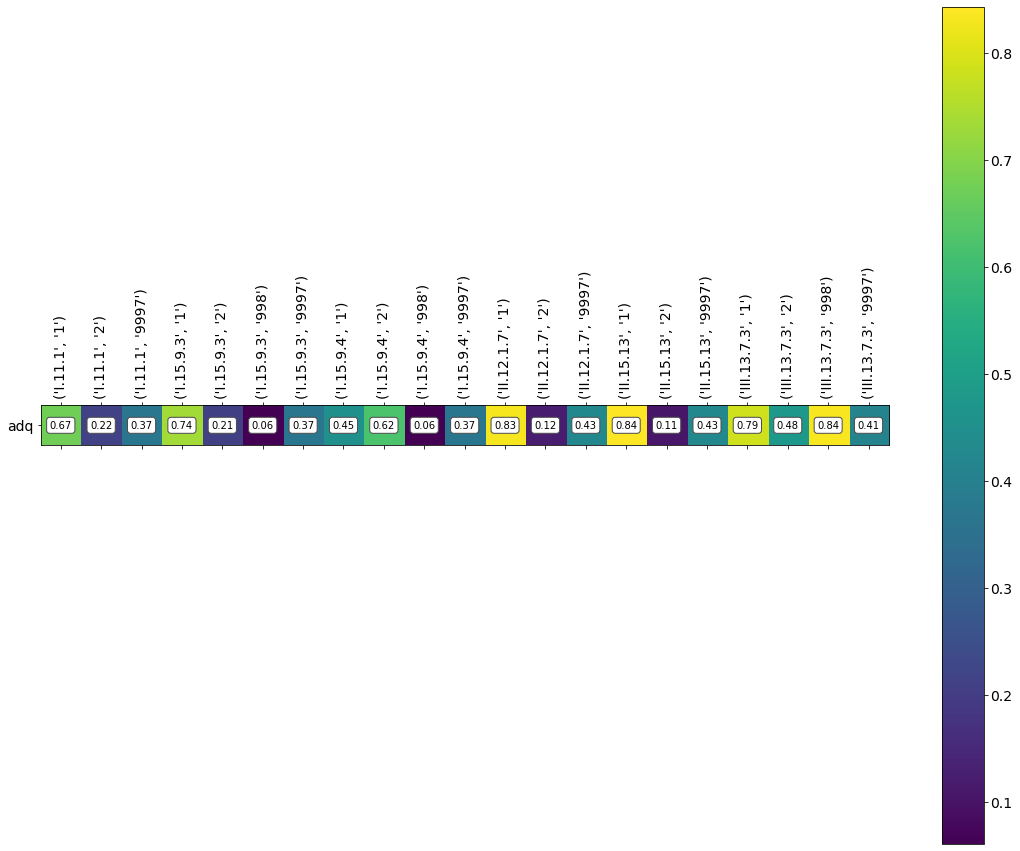

In [46]:
cormat = pmaq_df1.corr().iloc[-1:, :-1]

f = plt.figure(figsize=(19, 15))
plt.matshow(cormat, fignum=f.number)
plt.xticks(range(cormat.shape[1]), cormat.columns, fontsize=14, rotation=90)
plt.yticks(range(1), ['adq'], fontsize=14)
for (i, j), z in np.ndenumerate(cormat):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

As notificações de sífilis adquirida tem forte correlação positiva (0.83) com a resposta 1 da variável **II.12.1.7**, ou seja, com o acesso satisfatório e a presença do exame VDRL nos municípios. Dessa forma, quanto mais testes realizados de forma responsável, maior o número de notificações.

Também é notada uma forte correlação positiva entre as notificações de sífilis adquirida com a sinalização de que é feita a aplicação de penicilina G benzatina (var **II.15.13**, corr 0.84), da realização de exame de sífilis, VDRL, durante o pré-natal por parte das usuárias do SUS(var **III.13.7.3**, cor 0.79) e da disponibilidade de benzilpenicilina benzatina em quantidade suficiente (var **I.15.9.3**, corr 0.74).